# Práctica 8: 

Elaboró: Carlos Alejandro Jarero Gonzalez <al255813@alumnos.uacj.mx>

Matrícula: 255813

El presente Notebook fue relizado en equipo local con Kernel Python 3.11.8 en VS Code.

## Objetivos

Este ejercicio tiene como objetivo que los estudiantes aprendan a trabajar con seaborn para crear visualizaciones más avanzadas utilizando gráficos como el mapa de calor y el diagrama de violín. También, se les anima a explorar el dataset, hacer análisis descriptivos y aprender a interpretar los resultados.

## Dataset:
En este caso, vamos a utilizar el dataset de "tips" de seaborn, que contiene información sobre las propinas que dejaron los clientes en un restaurante, junto con detalles sobre el total de la cuenta, el día de la semana, si fue almuerzo o cena, entre otros. Para ello, los estudiantes podran cargar el dataset de la siguiente forma:

```python
import seaborn as sns 
df = sns.load_dataset('tips')
```
## Instrucciones

- Formato y personalización de los gráficos:
    - Personaliza cada gráfico con títulos, etiquetas en los ejes y leyendas cuando sea necesario.
    - Experimenta con diferentes colores, estilos y tamaños para hacer que las visualizaciones sean claras y atractivas.

1. Carga y exploración del dataset:

    - Cargar el dataset tips usando seaborn.
    - Realizar un análisis preliminar: utiliza ```.head()```, ```.info()```, ```.describe()``` para obtener una visión general de los datos.
    - Verificar la existencia de valores nulos o datos faltantes.

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.stats import spearmanr
import statsmodels.formula.api as smf
from scipy.stats import shapiro

df = sns.load_dataset('tips')

df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [282]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [284]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [285]:
print(f'Total rows {len(df.index)} and in all columns are 244 non-null')

Total rows 244 and in all columns are 244 non-null


2. Crear los siguientes gráficos con Seaborn:

    a) Mapa de Calor (Heatmap):

    - Objetivo: Visualizar la correlación entre las variables numéricas en el dataset.
    - Instrucciones: Utiliza un mapa de calor para mostrar la matriz de correlación entre las variables numéricas (total_bill, tip, size).
    - Asegúrate de personalizar el mapa con una paleta de colores y etiquetas en los ejes.

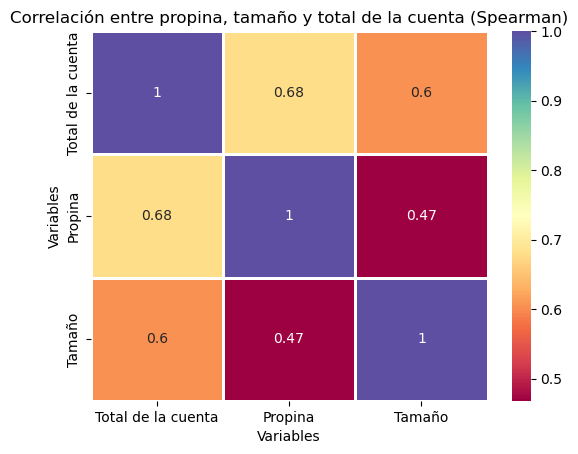

In [286]:
sns.heatmap(df[['total_bill', 'tip', 'size']].corr('spearman')
            , annot=True
            , cmap='Spectral'
            , linewidths=1
            , xticklabels=['Total de la cuenta','Propina','Tamaño']
            , yticklabels=['Total de la cuenta','Propina','Tamaño'])

plt.ylabel("Variables")
plt.xlabel("Variables")
plt.title("Correlación entre propina, tamaño y total de la cuenta (Spearman)")
plt.show()

#### Veamos si las correlaciones son significativas

In [287]:

shapiro_size, p_size = shapiro(df['size'])
shapiro_tip, p_tip = shapiro(df['tip'])
shapiro_bill, p_bill = shapiro(df['total_bill'])

print(f"Size => p={p_size:.5f}")
print(f"Tip => p={p_tip:.5f}")
print(f"Total bill => p={p_bill:.5f}")
print("Not normally distribuided variables")

rho_tip_total_bill, p_tip_total_bill = spearmanr(df['tip'],df['total_bill'])
rho_tip_size, p_tip_size = spearmanr(df['tip'],df['size'])
rho_size_total_bill, p_size_total_bill = spearmanr(df['size'],df['total_bill'])

print(f"Tip:Total bill => rho={rho_tip_total_bill:.2f} | p={p_tip_total_bill:.5f}")
print(f"Tip:Size => rho={rho_tip_size:.2f} | p={p_tip_size:.5f}")
print(f"Size:Total bill => rho={rho_size_total_bill:.2f} | p={p_size_total_bill:.5f}")

Size => p=0.00000
Tip => p=0.00000
Total bill => p=0.00000
Not normally distribuided variables
Tip:Total bill => rho=0.68 | p=0.00000
Tip:Size => rho=0.47 | p=0.00000
Size:Total bill => rho=0.60 | p=0.00000


 b) Diagrama de Violín:

- Objetivo: Mostrar la distribución de las propinas (tip) para diferentes días de la semana.
- Instrucciones: Utiliza un diagrama de violín para comparar cómo varía la distribución de las propinas en cada uno de los días (day).
- Personaliza el gráfico con colores y etiquetas adecuadas.

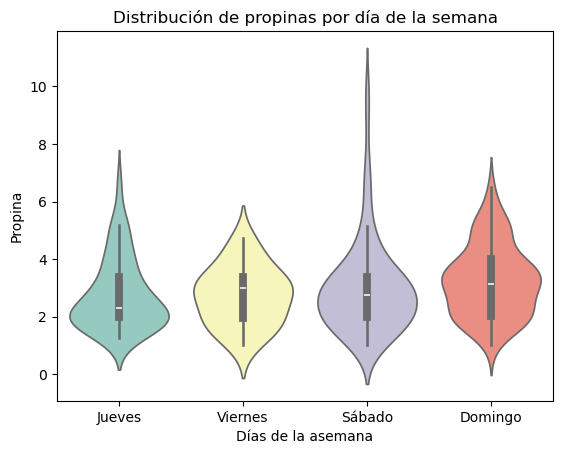

In [288]:
plot = sns.violinplot(y='tip', x='day', hue='day', data=df, palette='Set3')

plot.set_xticks([0,1,2,3])
plot.set_xticklabels(["Jueves","Viernes","Sábado","Domingo"])

plt.ylabel("Propina")
plt.xlabel("Días de la asemana")
plt.title("Distribución de propinas por día de la semana")
plt.show()


c) Gráfico de dispersión (Scatter Plot):

- Objetivo: Analizar la relación entre el total de la cuenta (total_bill) y la propina (tip).
- Instrucciones: Crea un gráfico de dispersión con total_bill en el eje X y tip en el eje Y. Usa un color diferente para cada día de la semana.

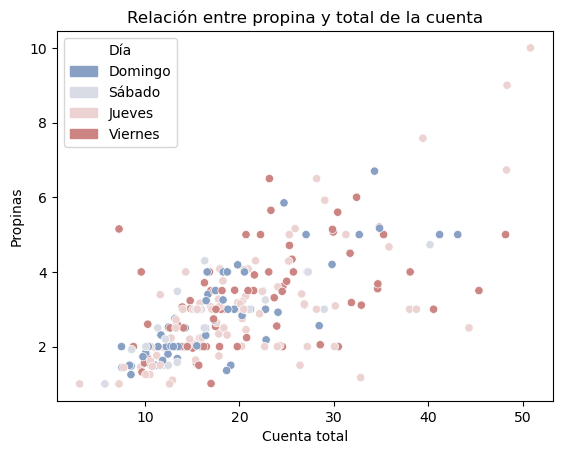

In [289]:
sns.scatterplot(y='tip', x='total_bill', hue='day', data=df, palette='vlag')

plt.ylabel("Propinas")
plt.xlabel("Cuenta total")
plt.title("Relación entre propina y total de la cuenta")

hue_order = df['day'].map({'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur': 'Jueves', 'Fri': 'Viernes'}).unique()
colors = sns.color_palette('vlag', n_colors=len(hue_order))

patches = [Patch(color=colors[i], label=hue_order[i]) for i in range(len(hue_order))]

plt.legend(handles=patches, title='Día', loc='best')

plt.show()

d) Gráfico de barras (Bar Plot):

- Objetivo: Comparar el promedio de la propina (tip) por género (sex).
- Instrucciones: Utiliza un gráfico de barras para mostrar el promedio de las propinas por género (hombres y mujeres).

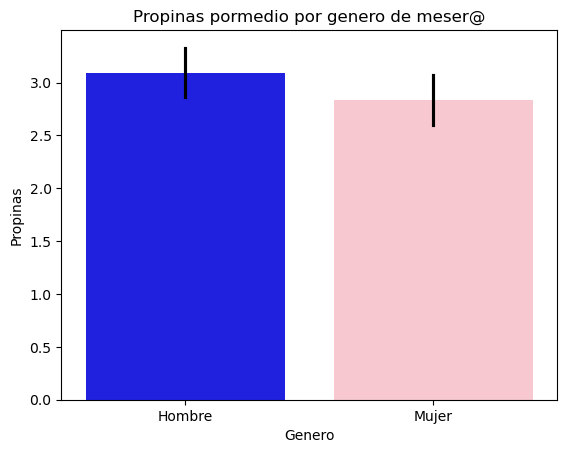

In [290]:
plotbar = sns.barplot(x='sex', y='tip'
                      , hue='sex'
                      , data=df
                      , palette={"Male": "blue", "Female": "pink"}
                      , err_kws={'color': 'black'})

plotbar.set_xticks([0,1])
plotbar.set_xticklabels(["Hombre","Mujer"])

plt.ylabel("Propinas")
plt.xlabel("Genero")
plt.title("Propinas pormedio por genero de meser@")

plt.show()

### Modelo para rpedecir las propinas

Debido a que las variables númericas tienen correlación y esta es significativa. Haremos un modelos con OLS.

In [291]:
model = smf.ols('tip ~ sex + total_bill + day + size',data=df)

res = model.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     34.93
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           4.04e-30
Time:                        23:29:13   Log-Likelihood:                -347.66
No. Observations:                 244   AIC:                             709.3
Df Residuals:                     237   BIC:                             733.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6487      0.235      2.756      0.006       0.185       1.112
sex[T.Female]     0.0326      0.141      0.231      0.818      -0.245       0.311
day[T.Fri]        0.0789      0.269      0.293      0.770      -0.451       0.609
day[T.Sat]       -0.0414      0.173     -0.239      0.811      -0.382       0.299
day[T.Sun]        0.0725      0.181      0.400      0.690      -0.284       0.429
total_bill        0.0932      0.009     10.019      0.000       0.075       0.112
size              0.1867      0.087      2.137      0.034       0.015       0.359
==============================================================================
Omnibus:                       26.163   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.406
Skew:                           0.571   Prob(JB):                     1.87e-11
Kurtosis:                       4.886   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En el modelo observamos que significacnia en cuanto al total de la cuenta, lo que es bastante lógico, encontrando un aumento de 0.093 por cada unidad del total de la cuenta. Otro significativo es el tamaño de la mesa, done por cada nuevo comensal la propina subirá 0.1867.

Nota: No se revisaron todos los supuestos, por lo tanto el modelo pudiera no ser el adecuado. Pero dan una udea de las variables que influyen en las propinas. 